# 07 Dense network

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow import keras

In [2]:
# Some global variables
features_basepath = '/data/ml_course/04_Applied_Machine_Learning_2/11_Course_project/'

In [3]:
# Load data
def load_data(features_basepath, features_file, one_hot_encoding=False):
    with np.load(os.path.join(features_basepath, features_file), allow_pickle=False) as npz_file:
        data = dict(npz_file.items())
        
    X = data['data']
    if one_hot_encoding:
        y = data['labels']
    else:
        y = np.where(data['labels'] == 1)[1]
    names = data['names']
    filenames = data['filenames']
    
    return X, y, names, filenames 

In [4]:
X_tr, y_tr, names, fn_tr = load_data(features_basepath, 'Swissroads_train.npz', one_hot_encoding=False)
X_va, y_va, _, fn_va = load_data(features_basepath, 'Swissroads_valid.npz', one_hot_encoding=False)
X_te, y_te, _, fn_te = load_data(features_basepath, 'Swissroads_test.npz', one_hot_encoding=False)
print(X_tr.shape, y_tr.shape)
print(X_va.shape, y_va.shape)
print(X_te.shape, y_te.shape)

(280, 1280) (280,)
(139, 1280) (139,)
(50, 1280) (50,)


## 1-layer network

In [5]:
model_1l = Sequential()
model_1l.add(Dense(6, activation='softmax', input_dim=1280))
model_1l.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 7686      
Total params: 7,686
Trainable params: 7,686
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Define loss function, optimizer and metrics to track during training
model_1l.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

In [7]:
# Fit model
hist_1l = model_1l.fit(
    x=X_tr, y=y_tr, validation_data=(X_va, y_va), epochs=200, callbacks=[early_stopping])

Train on 280 samples, validate on 139 samples
Epoch 1/200
280/280 [==============================] - 0s 1ms/step - loss: 1.6305 - acc: 0.4357 - val_loss: 1.1154 - val_acc: 0.6763
Epoch 2/200
280/280 [==============================] - 0s 58us/step - loss: 0.9718 - acc: 0.7500 - val_loss: 0.7966 - val_acc: 0.7986
Epoch 3/200
280/280 [==============================] - 0s 55us/step - loss: 0.7187 - acc: 0.8179 - val_loss: 0.6488 - val_acc: 0.8273
Epoch 4/200
280/280 [==============================] - 0s 54us/step - loss: 0.5779 - acc: 0.8607 - val_loss: 0.5615 - val_acc: 0.8705
Epoch 5/200
280/280 [==============================] - 0s 51us/step - loss: 0.4872 - acc: 0.8714 - val_loss: 0.5049 - val_acc: 0.8921
Epoch 6/200
280/280 [==============================] - 0s 51us/step - loss: 0.4196 - acc: 0.9071 - val_loss: 0.4568 - val_acc: 0.8849
Epoch 7/200
280/280 [==============================] - 0s 51us/step - loss: 0.3724 - acc: 0.9071 - val_loss: 0.4270 - val_acc: 0.9065
Epoch 8/200
280/2

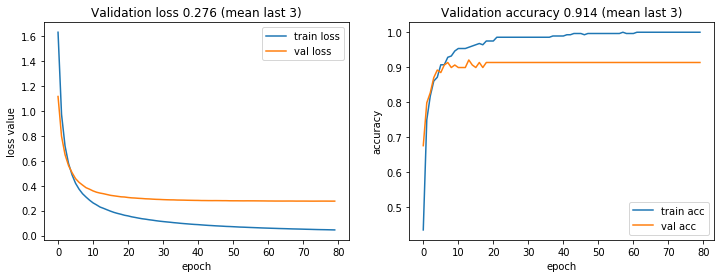

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(hist_1l.history['loss'], label='train loss')
ax1.plot(hist_1l.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(hist_1l.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(hist_1l.history['acc'], label='train acc')
ax2.plot(hist_1l.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(hist_1l.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [9]:
(test_loss_1l, test_accuracy_1l) = model_1l.evaluate(X_te, y_te)

print('Test loss: {:.2f}'.format(test_loss_1l))
print('Test accuracy: {:.2f}%'.format(100*test_accuracy_1l))

50/50 [==============================] - 0s 98us/step
Test loss: 0.21
Test accuracy: 92.00%


## 2-layer network

In [10]:
model_2l = Sequential()
model_2l.add(Dense(256, activation='relu', input_dim=1280))
model_2l.add(Dense(6, activation='softmax'))
model_2l.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               327936    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 329,478
Trainable params: 329,478
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Define loss function, optimizer and metrics to track during training
model_2l.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [12]:
# Fit model
hist_2l = model_2l.fit(
    x=X_tr, y=y_tr, validation_data=(X_va, y_va), epochs=200, callbacks=[early_stopping])
#    validation_split=0.8, batch_size=32, epochs=50,
#    shuffle=True # Shuffle training samples
# )

Train on 280 samples, validate on 139 samples
Epoch 1/200
280/280 [==============================] - 0s 1ms/step - loss: 1.4396 - acc: 0.5464 - val_loss: 1.0760 - val_acc: 0.7050
Epoch 2/200
280/280 [==============================] - 0s 135us/step - loss: 0.8721 - acc: 0.7929 - val_loss: 0.7776 - val_acc: 0.8201
Epoch 3/200
280/280 [==============================] - 0s 124us/step - loss: 0.6357 - acc: 0.8607 - val_loss: 0.6190 - val_acc: 0.8561
Epoch 4/200
280/280 [==============================] - 0s 123us/step - loss: 0.5030 - acc: 0.9036 - val_loss: 0.5294 - val_acc: 0.8633
Epoch 5/200
280/280 [==============================] - 0s 125us/step - loss: 0.4159 - acc: 0.9214 - val_loss: 0.4706 - val_acc: 0.8849
Epoch 6/200
280/280 [==============================] - 0s 130us/step - loss: 0.3547 - acc: 0.9286 - val_loss: 0.4315 - val_acc: 0.8993
Epoch 7/200
280/280 [==============================] - 0s 122us/step - loss: 0.3079 - acc: 0.9607 - val_loss: 0.3990 - val_acc: 0.9065
Epoch 8/200

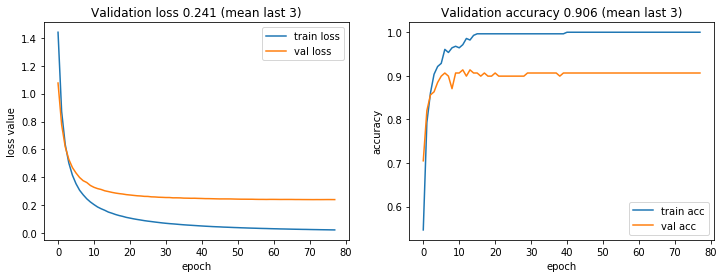

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(hist_2l.history['loss'], label='train loss')
ax1.plot(hist_2l.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(hist_2l.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(hist_2l.history['acc'], label='train acc')
ax2.plot(hist_2l.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(hist_2l.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [14]:
(test_loss_2l, test_accuracy_2l) = model_2l.evaluate(X_te, y_te)

print('Test loss: {:.2f}'.format(test_loss_2l))
print('Test accuracy: {:.2f}%'.format(100*test_accuracy_2l))

50/50 [==============================] - 0s 109us/step
Test loss: 0.22
Test accuracy: 94.00%


## Store results

In [15]:
df_acc = pd.DataFrame(
    {'model': ['1-layer nn', '2-layer nn'], 'test_accuracy': [100.*test_accuracy_1l, 100.*test_accuracy_2l]})
df_acc.to_csv('acc_nn.csv', index=False)